Project based on the dataset https://www.kaggle.com/datasets/denisadutca/customer-behaviour

Based on the independent features we want to estimate if the customer will purchase a product or not.

Obs.: The data set and algorithms were created based on Udemy course Machine Learning A-Z resources.

# Steps

1. Read Data (ETL)
2. Explore the data (ETL)
3. Data Analysis
4. Data splitting (Realizar o split antes do preprocessamento para evitar vazamento de informações para o conjunto de teste)
5. Data preprocessing (one hot encoder, normalization, ... -> Create a pickle archive or a new csv file with the data treated)
6. Training model pipeline
7. Metrics
8. pickle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#1. Read Data

In [2]:
df = pd.read_csv("/content/Customer_Behaviour.csv")

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Através dessas features podemos tirar insights gráficos, por exemplo:

 - Quanto uma pessoa ganha com base em sua idade

 - Quanto uma pessoa ganha com base em seu gênero

 - Outra análise que podemos fazer é quem compra mais, homens ou mulheres

 Obs.: Aparentemente, o salário exibido é anual, podemos criar um subconjunto com uma feature com salário mensal apenas para visualização

 Obs 2.: Exemplo para plotar gráfico de distribuição com seaborn: sns.displot(penguins, x="flipper_length_mm", kde=True)

# 2. Exploring the data (ETL)

In [3]:
df.shape

(400, 5)

In [4]:
# Removendo ID, pois não será uma feature útil para o problema
df.drop("User ID", axis=1, inplace=True)

In [5]:
df.rename(columns={'EstimatedSalary': 'Salary'}, inplace = True)

In [6]:
df.head()

,Gender,Age,Salary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df.isnull().sum()

Gender       0
Age          0
Salary       0
Purchased    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     400 non-null    object
 1   Age        400 non-null    int64 
 2   Salary     400 non-null    int64 
 3   Purchased  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


- Não há valores nulos no dataset

- !! Precisamos converter a feature ['Gender'] para quantitativa

In [9]:
df.describe()[['Age', 'Salary']]

,Age,Salary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


Aparentemente não há outliers, mas iremos confirmar isto na próxima etapa (Exploração dos dados)

Podemos ver também que não há problemas com o salário, exemplo, valor negativo ou zero

# Data Analysis

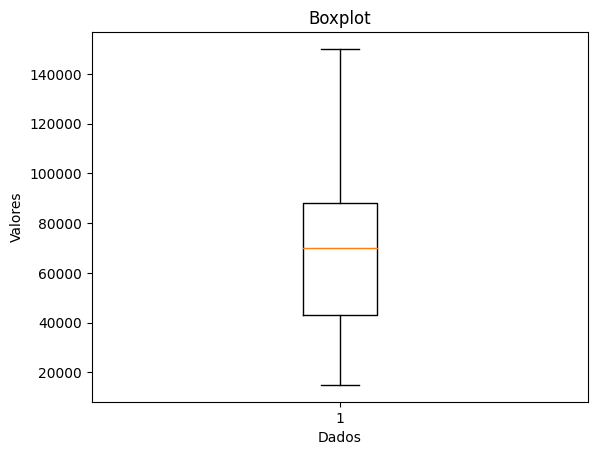

In [10]:
plt.boxplot(data=df, x=df['Salary'])

plt.title("Boxplot")
plt.xlabel("Dados")
plt.ylabel("Valores")

# Exibindo o gráfico
plt.show()

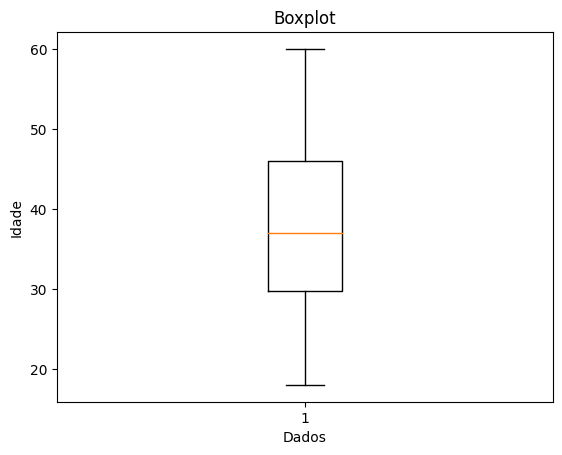

In [11]:
plt.boxplot(data=df, x=df['Age'])

plt.title("Boxplot")
plt.xlabel("Dados")
plt.ylabel("Idade")

# Exibindo o gráfico
plt.show()

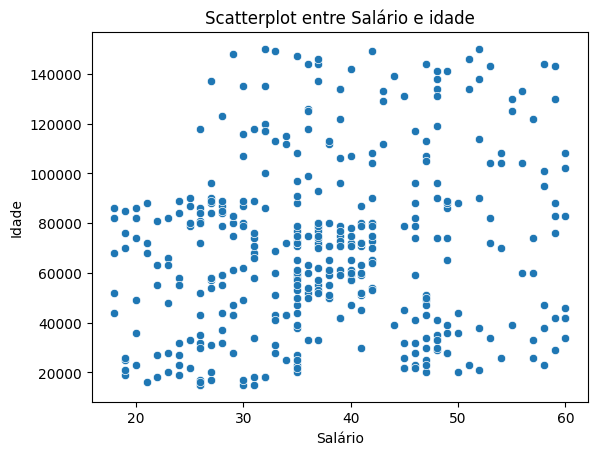

In [12]:
sns.scatterplot(x=df['Age'], y=df['Salary'])

plt.title("Scatterplot entre Salário e idade")
plt.xlabel("Salário")
plt.ylabel("Idade")

# Exibindo o gráfico
plt.show()

Não há linearidade entre idade e salário

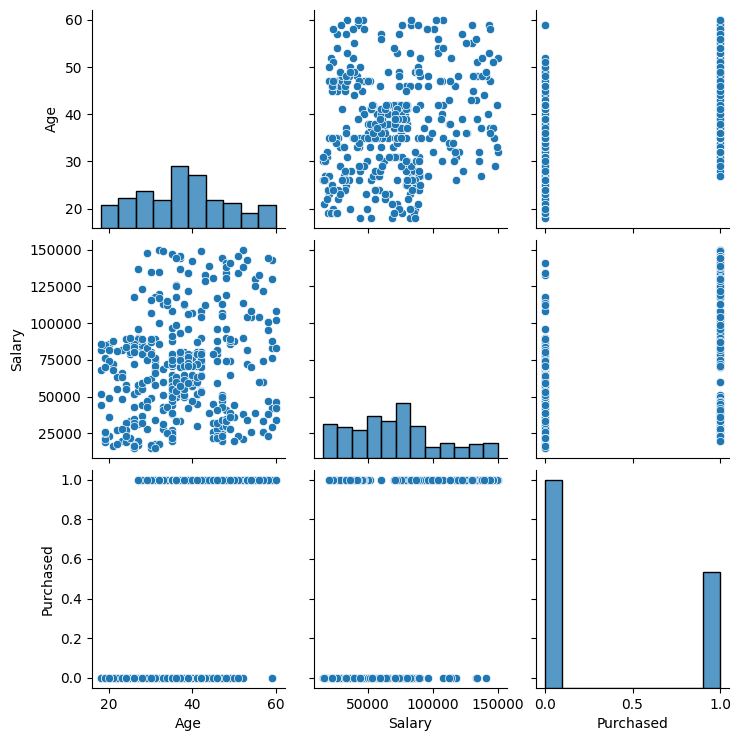

In [13]:
sns.pairplot(df)

<Axes: title={'center': 'Scatterplot entre Salário e idade'}, xlabel='Salário', ylabel='Purchased'>

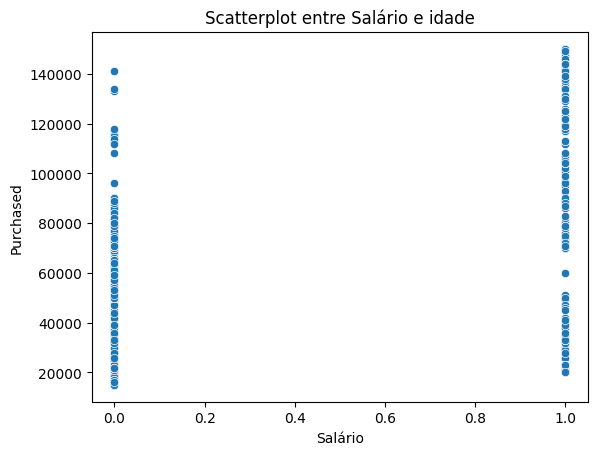

In [14]:
plt.title("Scatterplot entre Salário e idade")
plt.xlabel("Salário")
plt.ylabel("Purchased")

sns.scatterplot(x=df['Purchased'], y=df['Salary'])

É possível ver um gap na "coluna" de pessoas que realizaram uma compra, indicando que um determinado grupo de pessoas não realizaram compras

In [15]:
df['Salary'].mean()

69742.5

Pode ser que pessoas contidas na média salarial não comprem cursos por estarem satisfeitas com seus salários e profissão

In [16]:
df[(df['Salary'] >= 50000) & (df['Salary'] <= 70000)]

,Gender,Age,Salary,Purchased
3,Female,27,57000,0
5,Male,27,58000,0
9,Female,35,65000,0
11,Female,26,52000,0
41,Female,33,51000,0
...,...,...,...,...
362,Female,47,50000,1
377,Female,42,53000,0
380,Male,42,64000,0
385,Male,56,60000,1


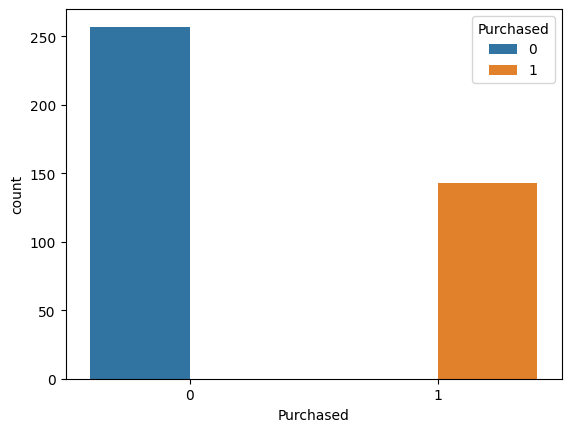

In [17]:
sns.countplot(x=df['Purchased'], hue='Purchased', data=df)

plt.show()

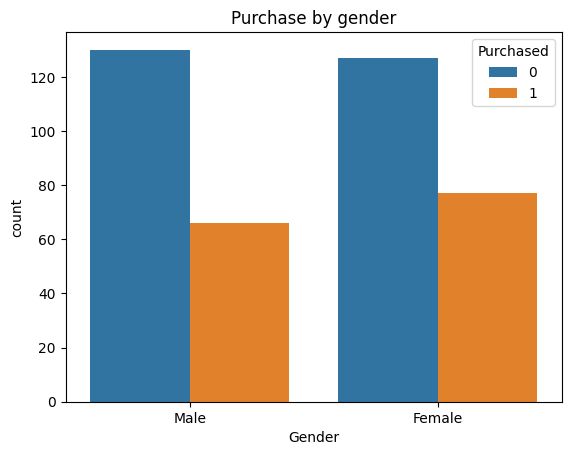

In [18]:
sns.countplot(x=df['Gender'], hue='Purchased', data=df)

plt.title("Purchase by gender")

plt.show()

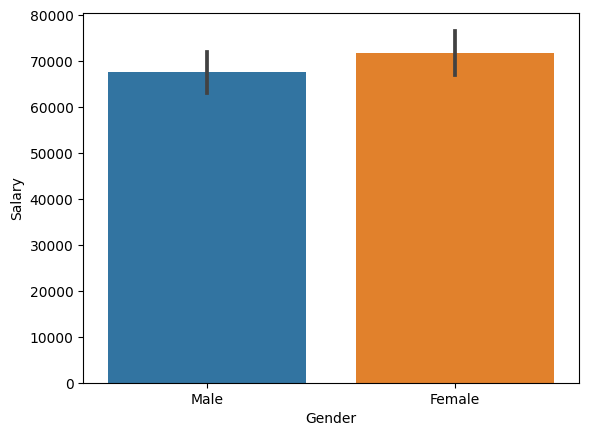

In [19]:
sns.barplot(data=df, x=df['Gender'], y=df['Salary'])

plt.show()

A princípio, nesta base de dados, as mulheres tem um poder de compra maior do que os homens. Isto pode explicar o porque compram mais também.

Ou até, como a base de dados se trata da compra de cursos, mulheres podem ter um leve interesse a mais no quesito aprendizado.

In [20]:
df_number = df[['Age', 'Salary', 'Purchased']]

<ipython-input-21-889aad3ad4b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_number['Salary'], kde=True)


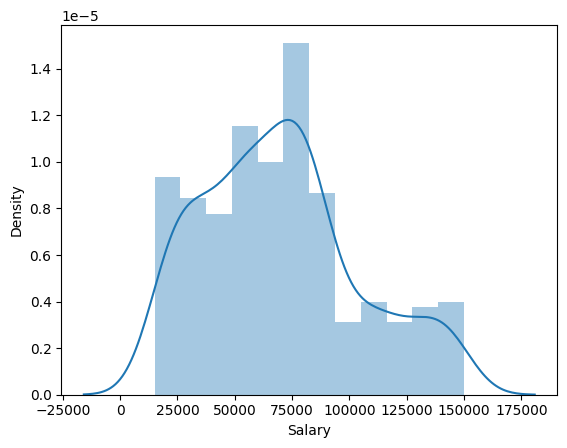

In [21]:
sns.distplot(df_number['Salary'], kde=True)

plt.show()

Ver uma forma de plotar vários gráficos do mesmo tipo com variáveis diferentes e também gráficos diferentes com a mesma variável

<Axes: xlabel='Age', ylabel='Salary'>

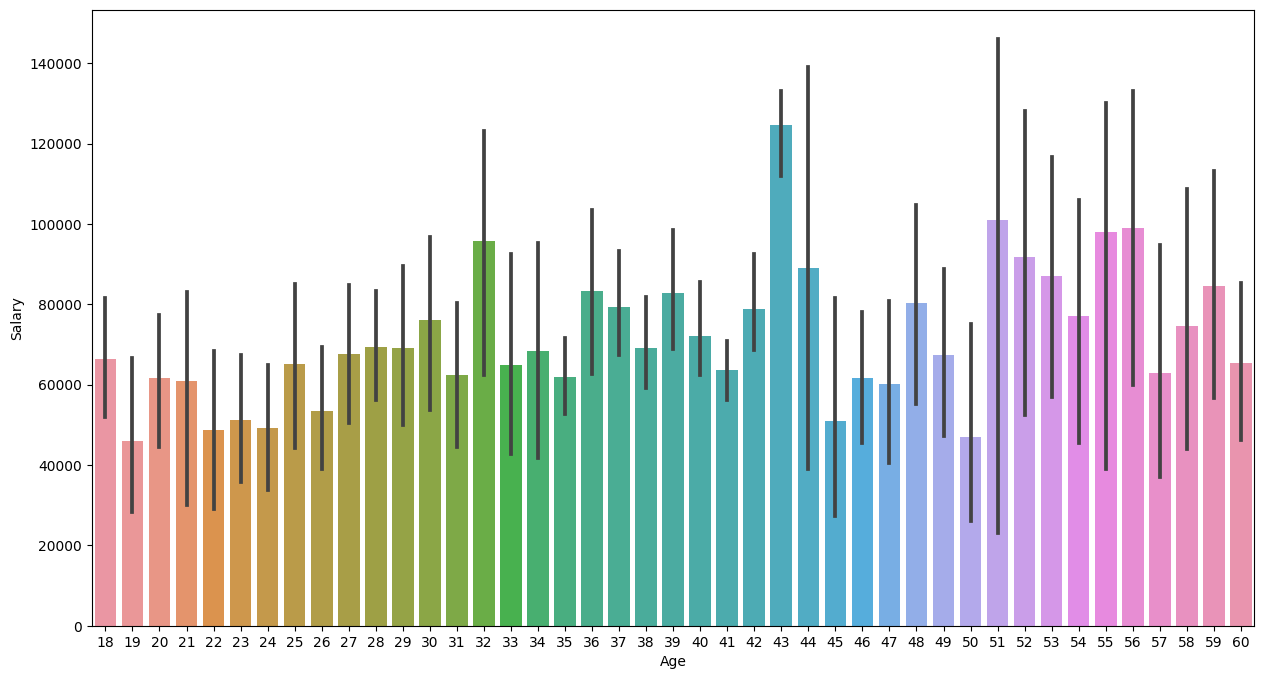

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x=df['Age'], y=df['Salary'])

<Axes: xlabel='Age', ylabel='Purchased'>

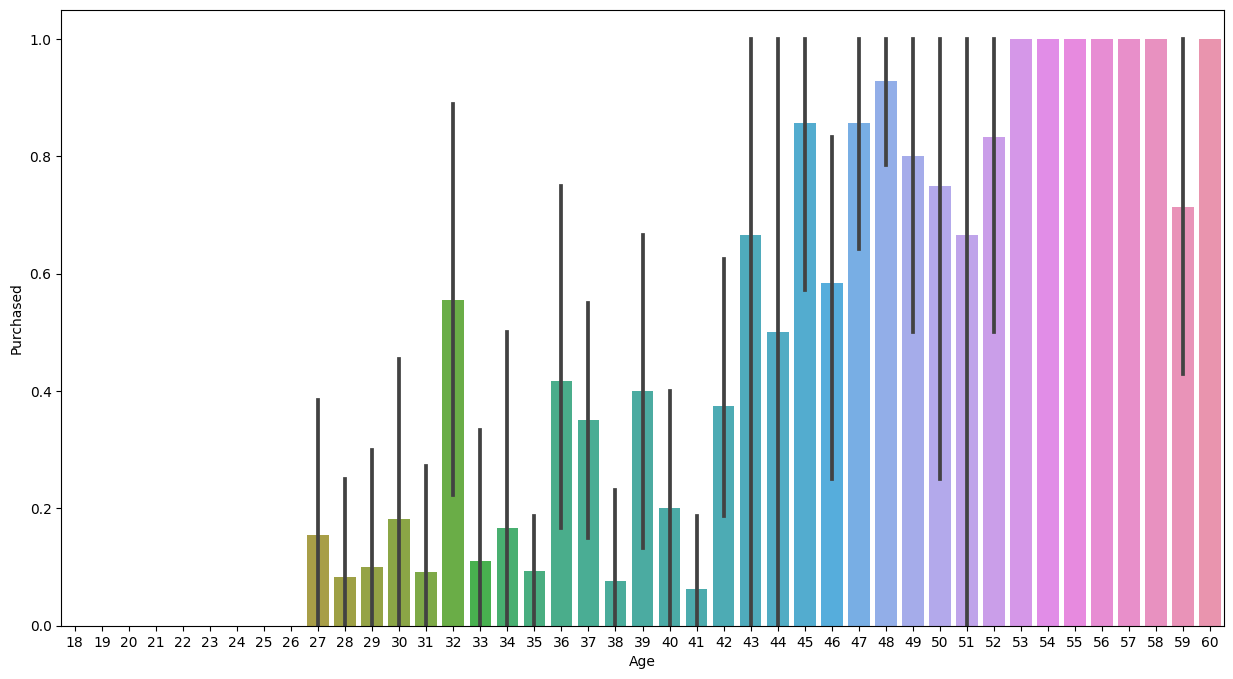

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x=df['Age'], y=df['Purchased'])

Verificar correlação entre as variáveis !!!!!!!



In [24]:
categorical_var = {'Male': 0, 'Female' : 1}

df['Gender'] = df['Gender'].map(categorical_var)

In [25]:
df.head()

,Gender,Age,Salary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [26]:
# sal_monthly = []
# for i in df['Salary']:
#   month = i/12
#   sal_monthly.append(month)

In [27]:
# print(len(sal_monthly))

In [28]:
# for x in sal_monthly:
#   print("{:.2f}".format(x))

Realizar correlação entre as variáveis

<Axes: >

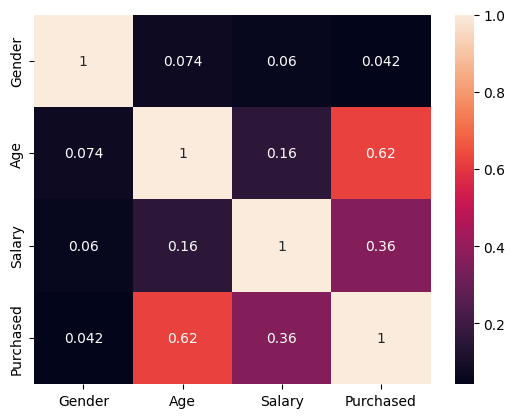

In [29]:
sns.heatmap(df.corr(), annot=True)

A variável genero não tem uma alta correlação com a variável alvo, porém como visto na análise, há uma pequena tendencia a quem é do genero feminino adquirir mais cursos.

**Possível solução:**

Portanto, uma possível solução seria focar em se comunicar mais com o público masculino.

Devido a análise acima, irei utilizar todas as variáveis já contidas no dataframe "df".

# Data Splitting

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop(df[['Purchased']], axis=1)

y = df['Purchased']

In [32]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)
print(f"Quantidade separada para dados de treino X e y, respectivamente: {X_train.shape} e {y_train.shape}")
print(f"Quantidade separada para dados de teste X e y, respectivamente: {X_test.shape} e {y_test.shape}")

Quantidade separada para dados de treino X e y, respectivamente: (320, 3) e (320,)
Quantidade separada para dados de teste X e y, respectivamente: (80, 3) e (80,)


# Data PreProcessing

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
X_train_normalized = scaler.fit_transform(X_train)

In [36]:
X_test_normalized = scaler.transform(X_test)

In [37]:
X_train_normalized[5]

array([1.        , 0.85714286, 0.68888889])

# Training model pipeline

Utilizar alguns algoritmos de classificação no pipeline, como: Regressão Logística, DecisionTreeClassifier, RandomForestClassifier, XGBoost, SVC

Seguir o vídeo: https://youtu.be/pmdM9wD_VHI

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

In [39]:
# list to contain model and accuracy values
eva_list = []
# to contain model names
models = []

1. Logistic Regression

In [40]:

lr = LogisticRegression()
lr.fit(X_train_normalized, y_train)
y_pred_lr = lr.predict(X_test_normalized)

lr_accuracy = round(lr.score(X_train_normalized, y_train) * 100, 2)
lr_acc_test = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
print(f"Train accuracy of the LOGISTIC REGRESSION {lr_accuracy} %")
print(f"Test accuracy of the LOGISTIC REGRESSION {lr_acc_test} %")

precision, recall, f1, support = score(y_test, y_pred_lr, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

Train accuracy of the LOGISTIC REGRESSION 80.0 %
Test accuracy of the LOGISTIC REGRESSION 88.75 %
Precision : 0.8887362637362637
Recall : 0.8726135615536537
F1-score : 0.8791743581137774


In [41]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Train Accuracy', round(lr_accuracy, 2)),
    ('Test Accuracy', round(lr_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

2. Decision Tree Classifier

In [42]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_normalized, y_train)
y_pred_dtc = dtc.predict(X_test_normalized)

dtc_accuracy = round(dtc.score(X_train_normalized, y_train) * 100, 2)
dtc_acc_test = round(accuracy_score(y_test, y_pred_dtc) * 100, 2)
print(f"Train accuracy of the DECISION TREE CLASSIFIER {dtc_accuracy} %")
print(f"Test accuracy of the DECISION TREE CLASSIFIER {dtc_acc_test} %")

precision, recall, f1, support = score(y_test, y_pred_dtc, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

Train accuracy of the DECISION TREE CLASSIFIER 99.69 %
Test accuracy of the DECISION TREE CLASSIFIER 81.25 %
Precision : 0.8063186813186813
Recall : 0.793614219881501
F1-score : 0.7986239301896291


In [43]:
# View feature importances
importances_dtc = pd.DataFrame({'feature': X_train.columns,
                             'importance': dtc.feature_importances_})
importances_dtc = importances_dtc.sort_values('importance',ascending=False).set_index('feature')
importances_dtc

,importance
feature,
Age,0.500479
Salary,0.474734
Gender,0.024786


In [44]:
eva_list.append(dict([
    ('Model', 'Decision Tree Classifier'),
    ('Train Accuracy', round(dtc_accuracy, 2)),
    ('Test Accuracy', round(dtc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

3. Random Forest Classifier

In [45]:
num_estimators = 100
seed = 7
rf = RandomForestClassifier(n_estimators= num_estimators)
rf.fit(X_train_normalized, y_train)
y_pred_rf = rf.predict(X_test_normalized)

rf_accuracy = round(rf.score(X_train_normalized, y_train) * 100, 2)
rf_acc_test = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
print(f"Train accuracy of the RANDOM FOREST CLASSIFIER {rf_accuracy} %")
print(f"Test accuracy of the RANDOM FOREST CLASSIFIER {rf_acc_test} %")

precision, recall, f1, support = score(y_test, y_pred_rf, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

Train accuracy of the RANDOM FOREST CLASSIFIER 99.69 %
Test accuracy of the RANDOM FOREST CLASSIFIER 85.0 %
Precision : 0.8451656524678837
Recall : 0.836076366030283
F1-score : 0.8399999999999999


In [46]:
# View feature importances
importances_rf = pd.DataFrame({'feature': X_train.columns,
                             'importance': rf.feature_importances_})
importances_rf = importances_rf.sort_values('importance',ascending=False).set_index('feature')
importances_rf

,importance
feature,
Age,0.517739
Salary,0.473235
Gender,0.009026


In [47]:
eva_list.append(dict([
    ('Model', 'Random Forest Classifier'),
    ('Train Accuracy', round(rf_accuracy, 2)),
    ('Test Accuracy', round(rf_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

4. XGBoost

In [48]:
xgboost = xgb.XGBClassifier(silent=False,
                      scale_pos_weight=1,
                      learning_rate=0.01,
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic',
                      n_estimators=1000,
                      reg_alpha = 0.3,
                      max_depth=4,
                      gamma=10)

xgboost.fit(X_train_normalized, y_train)
y_pred_xg = xgboost.predict(X_test_normalized)

xg_accuracy = round(xgboost.score(X_train_normalized, y_train) * 100, 2)
xg_acc_test = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
print(f"Train accuracy of the XGBOOST CLASSIFIER {xg_accuracy} %")
print(f"Test accuracy of the XGBOOST CLASSIFIER {xg_acc_test} %")

precision, recall, f1, support = score(y_test, y_pred_rf, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

[02:05:42] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Train accuracy of the XGBOOST CLASSIFIER 90.94 %
Test accuracy of the XGBOOST CLASSIFIER 85.0 %
Precision : 0.8451656524678837
Recall : 0.836076366030283
F1-score : 0.8399999999999999


In [49]:
eva_list.append(dict([
    ('Model', 'XGBOOST'),
    ('Train Accuracy', round(xg_accuracy, 2)),
    ('Test Accuracy', round(xg_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

5. Linear SVC

In [50]:
svc = SVC(kernel='linear', gamma='scale', C=100, probability=True)
svc.fit(X_train_normalized, y_train)
y_pred_svc = svc.predict(X_test_normalized)

svc_accuracy = round(svc.score(X_train_normalized, y_train) * 100, 2)
svc_acc_test = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
print(f"Train accuracy of the SVC {svc_accuracy} %")
print(f"Test accuracy of the SVC {svc_acc_test} %")

precision, recall, f1, support = score(y_test, y_pred_rf, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

Train accuracy of the SVC 84.06 %
Test accuracy of the SVC 85.0 %
Precision : 0.8451656524678837
Recall : 0.836076366030283
F1-score : 0.8399999999999999


In [51]:
eva_list.append(dict([
    ('Model', 'SVC'),
    ('Train Accuracy', round(svc_accuracy, 2)),
    ('Test Accuracy', round(svc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

6. KNN

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_normalized, y_train)
y_pred = knn.predict(X_test_normalized)

knn_accuracy = round(knn.score(X_train_normalized, y_train) * 100, 2)
knn_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Train Accuracy of KNN: % {knn_accuracy}')
print(f'Test Accuracy of KNN: % {knn_acc_test}')

# Get precision, recall, and f1
precision, recall, f1, support = score(y_test, y_pred, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

Train Accuracy of KNN: % 92.5
Test Accuracy of KNN: % 91.25
Precision : 0.9047314578005115
Recall : 0.9167215273206056
F1-score : 0.9093117408906883


In [53]:
eva_list.append(dict([
    ('Model', 'KNN'),
    ('Train Accuracy', round(knn_accuracy, 2)),
    ('Test Accuracy', round(knn_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

Evaluation

In [54]:
results = pd.DataFrame(data=eva_list)
results = results[['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
results = results.sort_values(by='Recall', ascending=False)
results = results.set_index('Model')
results

,Train Accuracy,Test Accuracy,Precision,Recall,F1
Model,,,,,
KNN,92.50,91.25,0.90,0.92,0.91
Logistic Regression,80.00,88.75,0.89,0.87,0.88
Random Forest Classifier,99.69,85.00,0.85,0.84,0.84
XGBOOST,90.94,85.00,0.85,0.84,0.84
SVC,84.06,85.00,0.85,0.84,0.84
Decision Tree Classifier,99.69,81.25,0.81,0.79,0.80


In [55]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score

In [58]:
conf_knn = confusion_matrix(y_test, y_pred)
conf_lr = confusion_matrix(y_test, y_pred_lr)

def conf_matrix(x):
    plt.figure(dpi=125)
    sns.heatmap(x, annot=True, square=True,fmt='d',
               xticklabels=['No Purchase', 'Purchased'],
               yticklabels=['No Purchase', 'Purchased'])

    plt.xlabel('Predicted purchase')
    plt.ylabel('Actual purchase')

Text(0.5, 1.0, 'Confusion Matrix of KNN')

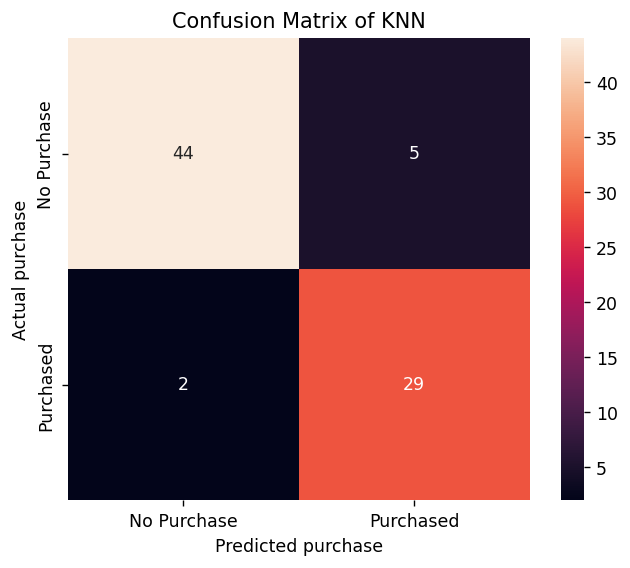

In [59]:
conf_matrix(conf_knn)
plt.title('Confusion Matrix of KNN')

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

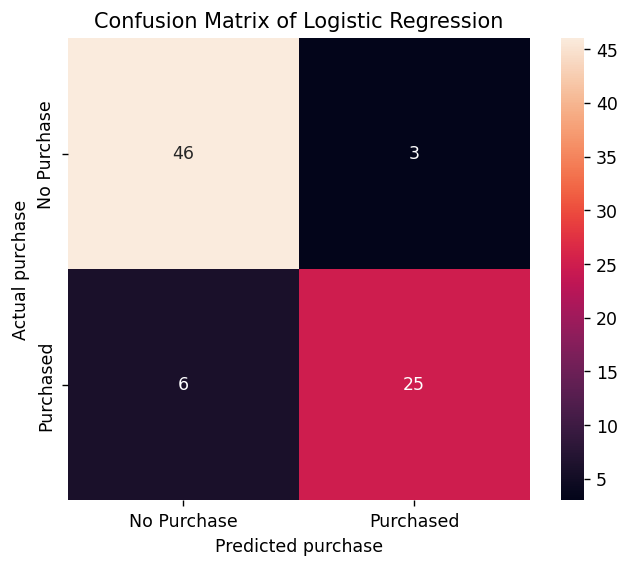

In [60]:
conf_matrix(conf_lr)
plt.title('Confusion Matrix of Logistic Regression')

Optimizating the model with GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

1. n_neighbors: Decide the best k based on the values we have computed earlier.
2. weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
3. metric: The distance metric to be used will calculating the similarity.

In [65]:
params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [67]:
kf = kf=KFold(n_splits=10, shuffle=True, random_state=76)
knn_grid = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=kf, n_jobs = -1)
knn_grid.fit(X_train_normalized, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=76, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [68]:
y_pred = knn_grid.predict(X_test_normalized)

opt_knn_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Test Accuracy of KNN: % {opt_knn_acc_test}')

# Get precision, recall, and f1
precision, recall, f1, support = score(y_test, y_pred, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

Test Accuracy of KNN: % 91.25
Precision : 0.9047314578005115
Recall : 0.9167215273206056
F1-score : 0.9093117408906883


In [69]:
# examine the best model
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan')


ROC AUC score =  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


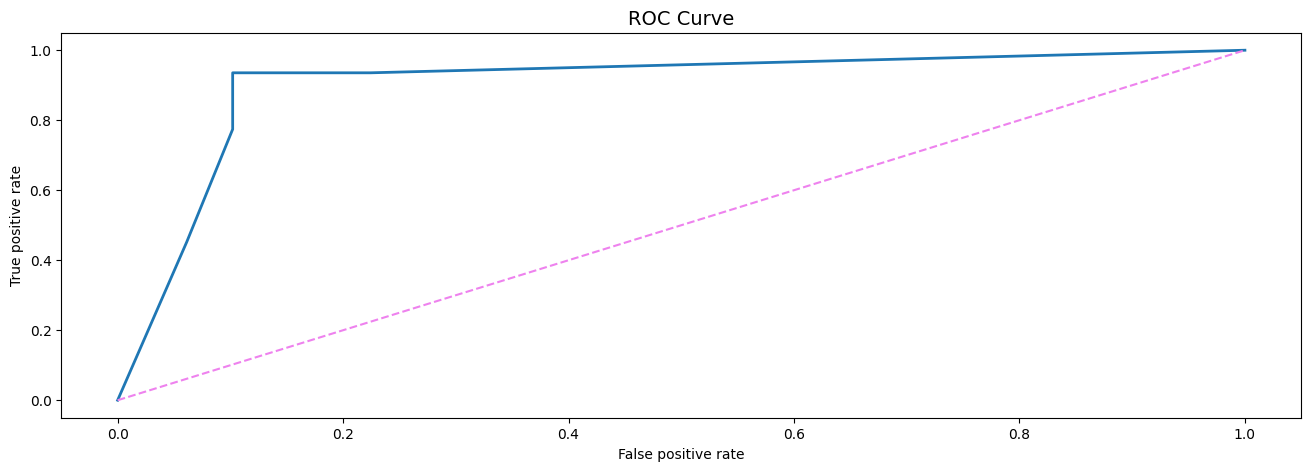

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, knn_grid.predict_proba(X_test_normalized)[:,1])

plt.figure(figsize = (16,5))
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve', fontsize=14)
print("ROC AUC score = ", roc_auc_score(y_test, knn_grid.predict_proba(X_test)[:,1]))

Text(0.5, 1.0, 'Precision and Recall Curves')

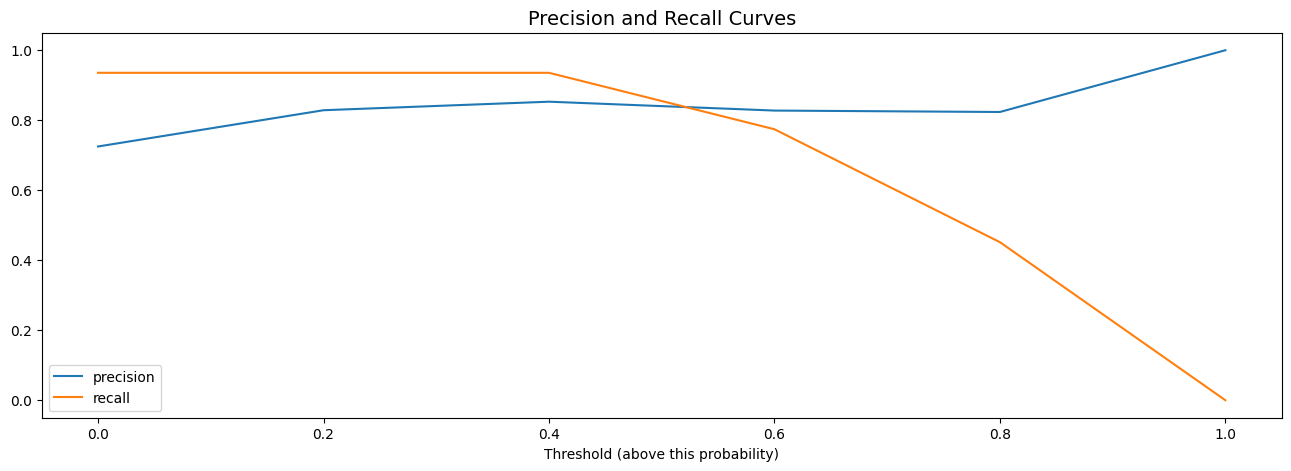

In [70]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, knn_grid.predict_proba(X_test_normalized)[:,1] )

plt.figure(figsize = (16,5))
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)')
plt.title('Precision and Recall Curves', fontsize=14)

In [74]:
import pickle
pickle.dump(knn_grid, open("model_knn_customer_behavior.pkl","wb"))